In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Assumption of data
Pr=3500 #psig
Qi=4000 #stb\day at a Pwf=1000 #psig
Pwf=2500 #psig

In [ ]:
#Generates 40 evenly spaced numbers from Reservoir Pressure(Pr) to 0
p=np.linspace(Pr,0,40)

# By Using **Vogel Equation**  

Assumption

# **Saturate Reservoir**

In [ ]:
#Calculation of maximum flow rate (Q_max)
Q_max=Qi/(1-0.2*(Pwf/Pr)-.8*(Pwf/Pr)**2)
Q_max

8909.09090909091

In [ ]:
#Calculation of flow rate at different flowing bottom hole pressure
Q_cal=[]
for i in p:
  Q=Q_max*(1-0.2*(i/Pr)-.8*(i/Pr)**2)
  Q_cal.append(Q)

In [ ]:
#Conversion of data into dataframe
df=pd.DataFrame({"Pwf":p,
                 "Q":Q_cal})
df.head()

,Pwf,Q
0,3500.000000,0.000000
1,3410.256410,406.502899
2,3320.512821,803.633973
3,3230.769231,1191.393222
4,3141.025641,1569.780647


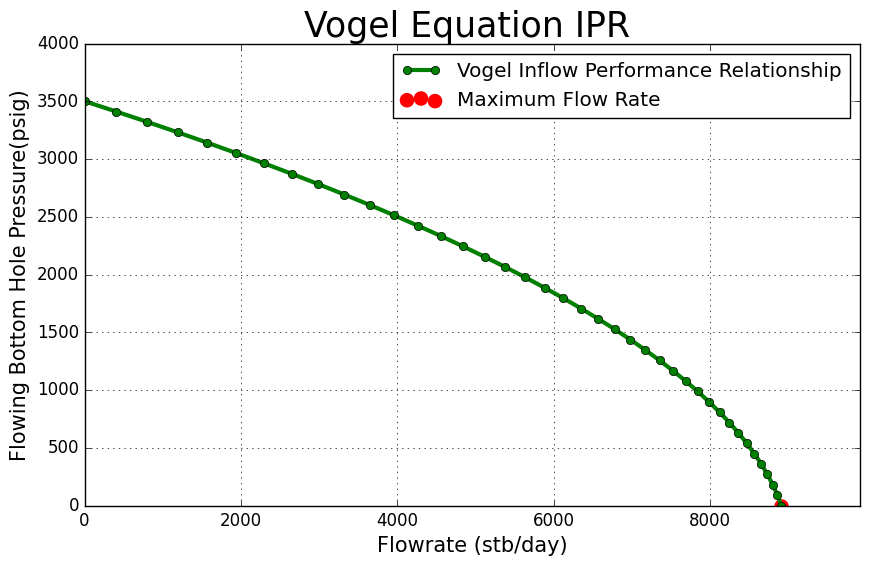

In [ ]:
#Ploting IPR using Vogel's Equation
plt.figure(figsize=(10,6))
plt.style.use("classic")
plt.plot(Q_cal,p,linewidth=3,color="green",label="Vogel Inflow Performance Relationship",marker="o")
plt.scatter(Q_max,0,label="Maximum Flow Rate",color="red",marker="o",lw=6)
plt.title("Vogel Equation IPR ",size=25)
plt.xlabel("Flowrate (stb/day)",size=15)
plt.ylabel("Flowing Bottom Hole Pressure(psig)",size=15)
plt.xlim(0,max(Q_cal)+1000)
plt.ylim(0,4000)
plt.legend()
plt.grid()
plt.show()

# **Future IPR For Saturated Reservoir**

**Standing Equation**

In [ ]:
#Assumption of reservoir pressure is depleted to 3000 psig
Pr_f=3000 #psig
#Current zero drawdown productivity index
J_p=1.8*Q_max/Pr
print("J_p",J_p)
#Since pvt is not mention , used pressure squared method
J_f=J_p*(Pr_f/Pr)**2
print("J_f",J_f)

J_p 4.581818181818182
J_f 3.366233766233766


In [ ]:
#Generates 100 evenly spaced numbers from Depleted Reservoir Pressure(Pr) to 0
P=np.linspace(Pr_f,0,100)

In [ ]:
#Calculation of flow rate
Q_max=J_f*Pr_f/1.8
Q_f=[]

for i in P:
  q=Q_max*(1-0.2*(i/Pr_f)-.8*(i/Pr_f)**2)
  Q_f.append(q)
Q_max

5610.38961038961

In [ ]:
#Generates dataframe
df=pd.DataFrame({
    "Pwf":P,
    "Q":Q_f
})
df.head()

,Pwf,Q
0,3000.000000,0.000000
1,2969.696970,101.549140
2,2939.393939,202.182391
3,2909.090909,301.899753
4,2878.787879,400.701227


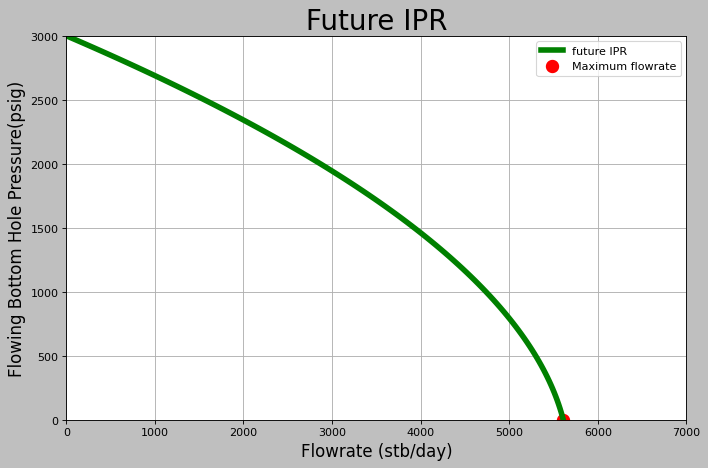

In [ ]:
#Plotting of future IPR
plt.figure(figsize=(10,6))
plt.style.use("default")
plt.plot(Q_f,P,label="future IPR",lw=5,color="green")
plt.scatter(Q_max,0,label="Maximum flowrate",color="red",lw=6)
plt.title(" Future IPR ",size=25)
plt.xlabel("Flowrate (stb/day)",size=15)
plt.ylabel("Flowing Bottom Hole Pressure(psig)",size=15)
plt.xlim(0,7000)
plt.ylim(0,3000)
plt.legend()
plt.grid()
plt.show()

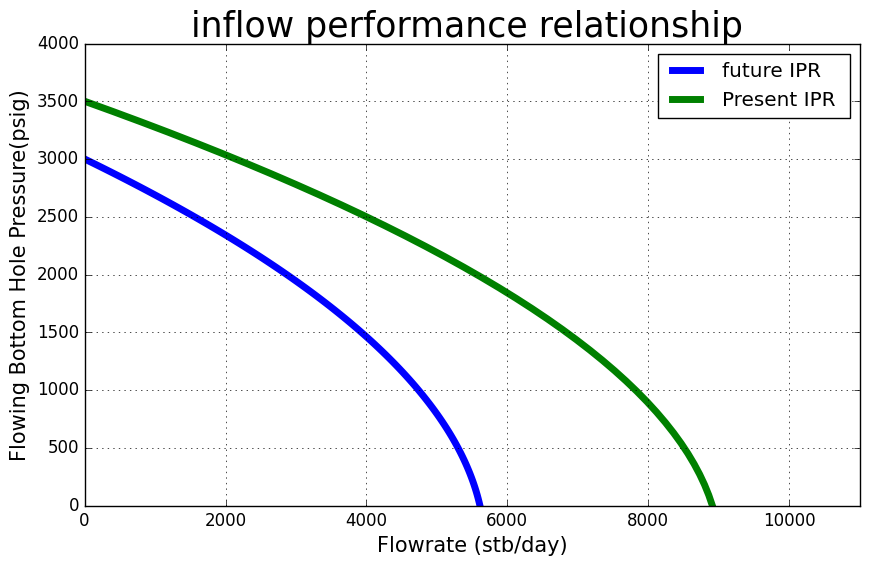

In [ ]:
#Plotting of both Present and Future IPR
plt.figure(figsize=(10,6))
plt.style.use("classic")
plt.plot(Q_f,P,label="future IPR",lw=5)
plt.plot(Q_cal,p,linewidth=5,color="green",label="Present IPR ")
plt.title("inflow performance relationship ",size=25)
plt.xlabel("Flowrate (stb/day)",size=15)
plt.ylabel("Flowing Bottom Hole Pressure(psig)",size=15)
plt.xlim(0,11000)
plt.ylim(0,4000)
plt.legend()
plt.grid()
plt.show()